In [1]:
import numpy as np

In [2]:
import pandas as pd
wearable_data = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv",sep=";", header = 0, decimal = ",")

In [3]:
categorical_columns = ["gender"]
categorical_data = pd.DataFrame()
wearable_data["gender"] = wearable_data["gender"].astype('category')
wearable_data[categorical_columns] = wearable_data[categorical_columns].apply(lambda x: x.cat.codes)
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [4]:
categorical_columns = ["class"]
categorical_data = pd.DataFrame()
onehot_encoded_data = pd.get_dummies(wearable_data[["class"]])
categorical_data = pd.concat([categorical_data, onehot_encoded_data], axis = 1)
wearable_data = pd.concat([wearable_data.ix[:,:-1], categorical_data],axis=1)
wearable_data[0:5]

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,y3,z3,x4,y4,z4,class_sitting,class_sittingdown,class_standing,class_standingup,class_walking
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,...,104,-92,-150,-103,-147,1.0,0.0,0.0,0.0,0.0
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,...,104,-90,-149,-104,-145,1.0,0.0,0.0,0.0,0.0
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,...,104,-90,-151,-104,-144,1.0,0.0,0.0,0.0,0.0
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,...,104,-89,-153,-103,-142,1.0,0.0,0.0,0.0,0.0
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,...,104,-89,-153,-104,-143,1.0,0.0,0.0,0.0,0.0


In [5]:
features = wearable_data[wearable_data.columns.values[1:-5]].as_matrix()
labels = wearable_data[wearable_data.columns.values[-5:]].as_matrix()
print(features[0:2, :])
print()
print(labels[0:5, :])

[[   1.     46.      1.62   75.     28.6    -3.     92.    -63.    -23.
    18.    -19.      5.    104.    -92.   -150.   -103.   -147.  ]
 [   1.     46.      1.62   75.     28.6    -3.     94.    -64.    -21.
    18.    -18.    -14.    104.    -90.   -149.   -104.   -145.  ]]

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]


In [6]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33,random_state=42)

In [36]:
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(17, input_dim=17, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [37]:
model.fit(features_train,labels_train,nb_epoch=5)

Epoch 1/5
110974/110974 [==============================] - 40s - loss: 0.5584 - acc: 0.7996    
Epoch 2/5
110974/110974 [==============================] - 38s - loss: 0.3636 - acc: 0.8692    
Epoch 3/5
110974/110974 [==============================] - 39s - loss: 0.3274 - acc: 0.8821    
Epoch 4/5
110974/110974 [==============================] - 39s - loss: 0.2849 - acc: 0.8985    
Epoch 5/5
110974/110974 [==============================] - 40s - loss: 0.2751 - acc: 0.9044    


In [38]:
loss_and_metrics = model.evaluate(features_test, labels_test, batch_size=32)

54656/54659 [============================>.] - ETA: 0s

In [39]:
print(loss_and_metrics)

[0.25035884703115691, 0.90991419528348483]


In [42]:
from keras.utils.visualize_util import plot
plot(model, show_shapes=True, to_file='model.png')

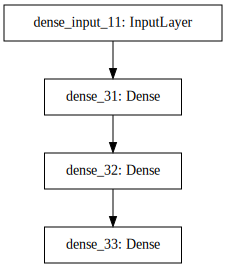

In [41]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))